In [1]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import time

# load dataset
data_path = '../data/processed/data_cleaned_scaled.csv' 
data = pd.read_csv(data_path)

numerical_cols = ['Admission grade', 
                  'Unemployment rate', 
                  'Inflation rate', 
                  'GDP', 
                  'Application order',
                  'Age at enrollment',
                  'Previous qualification (grade)', 
                  'Curricular units 1st sem (credited)', 
                  'Curricular units 1st sem (enrolled)', 
                  'Curricular units 1st sem (evaluations)', 
                  'Curricular units 1st sem (approved)', 
                  'Curricular units 1st sem (grade)', 
                  'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 
                  'Curricular units 2nd sem (enrolled)', 
                  'Curricular units 2nd sem (evaluations)', 
                  'Curricular units 2nd sem (approved)', 
                  'Curricular units 2nd sem (grade)', 
                  'Curricular units 2nd sem (without evaluations)']  
categorical_cols = [col for col in data.columns if col not in numerical_cols]

# set numerical and categorical features
data[numerical_cols] = data[numerical_cols].astype(float)
data[categorical_cols] = data[categorical_cols].astype("category")

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Num Features: 34, Accuracy: 0.878778
Num Features: 1, Accuracy: 0.801925
Num Features: 2, Accuracy: 0.781012
Num Features: 3, Accuracy: 0.804184
Num Features: 4, Accuracy: 0.814076
Num Features: 5, Accuracy: 0.828205
Num Features: 6, Accuracy: 0.830181
Num Features: 7, Accuracy: 0.837810
Num Features: 8, Accuracy: 0.869456
Num Features: 9, Accuracy: 0.869456
Num Features: 10, Accuracy: 0.870020
Num Features: 11, Accuracy: 0.874543
Num Features: 12, Accuracy: 0.873131
Num Features: 13, Accuracy: 0.875956
Num Features: 14, Accuracy: 0.876521
Num Features: 15, Accuracy: 0.876804
Num Features: 16, Accuracy: 0.871436
Num Features: 17, Accuracy: 0.877369
Num Features: 18, Accuracy: 0.876239
Num Features: 19, Accuracy: 0.876804
Num Features: 20, Accuracy: 0.877369
Num Features: 21, Accuracy: 0.876521
Num Features: 22, Accuracy: 0.877934
Num Features: 23, Accuracy: 0.874261
Num Features: 24, Accuracy: 0.874827
Num Features: 25, Accuracy: 0.878500
Num Features: 26, Accuracy: 0.877654
Num Featur

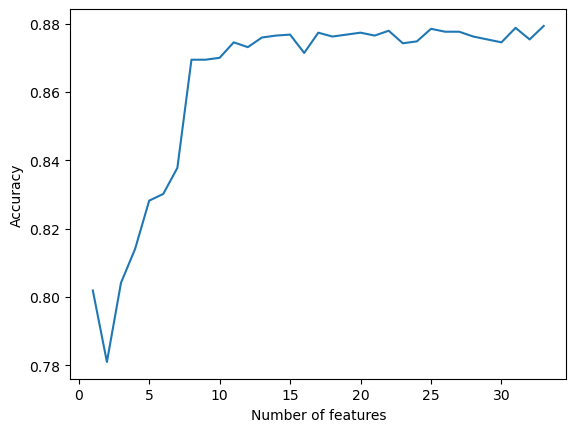

In [2]:
# loop through the # of features to select and plot the accuracy

# first calculate the accuracy for all features
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Num Features: %d, Accuracy: %f" % (X_train.shape[1], scores.mean()))

rfe_scores = []

for n in range(1, X.shape[1]):
    rfe = RFE(RandomForestClassifier(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    X_train_selected = X_train[X_train.columns[rfe.support_]]

    model = RandomForestClassifier()
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))
    rfe_scores.append(scores.mean())

plt.plot(range(1, X_train.shape[1]), rfe_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

In [3]:
# finally test the model on test set
n_features = 12
rfe = RFE(RandomForestClassifier(), n_features_to_select=n_features)
rfe.fit(X_train, y_train)
X_train_selected = X_train[X_train.columns[rfe.support_]]
X_test_selected = X_test[X_test.columns[rfe.support_]]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))


0.8395480225988701


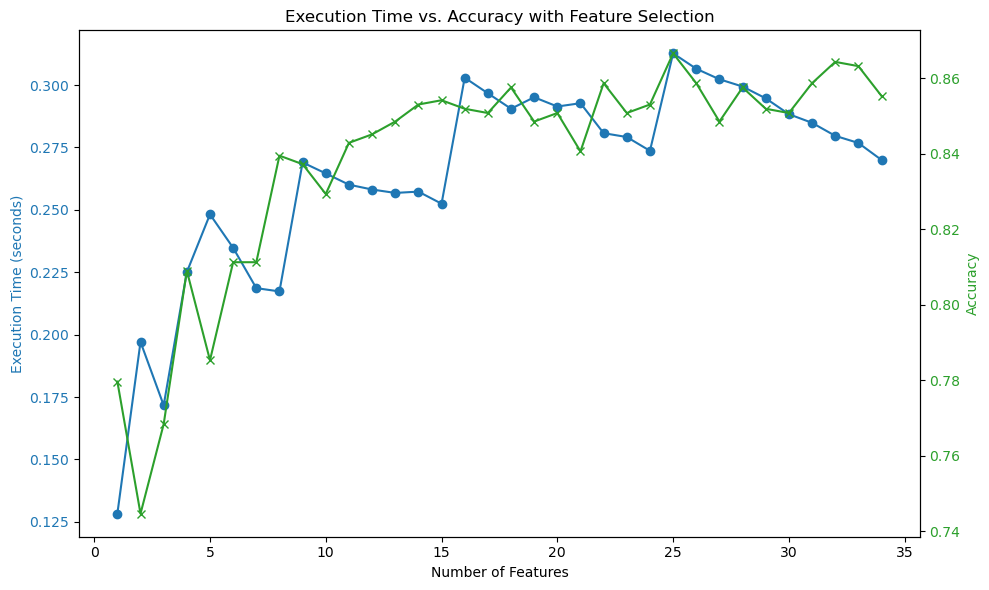

Features: 1, Time: 0.1283 sec, Accuracy: 0.7797
Features: 2, Time: 0.1971 sec, Accuracy: 0.7446
Features: 3, Time: 0.1717 sec, Accuracy: 0.7684
Features: 4, Time: 0.2250 sec, Accuracy: 0.8090
Features: 5, Time: 0.2482 sec, Accuracy: 0.7853
Features: 6, Time: 0.2348 sec, Accuracy: 0.8113
Features: 7, Time: 0.2186 sec, Accuracy: 0.8113
Features: 8, Time: 0.2173 sec, Accuracy: 0.8395
Features: 9, Time: 0.2690 sec, Accuracy: 0.8373
Features: 10, Time: 0.2646 sec, Accuracy: 0.8294
Features: 11, Time: 0.2601 sec, Accuracy: 0.8429
Features: 12, Time: 0.2581 sec, Accuracy: 0.8452
Features: 13, Time: 0.2568 sec, Accuracy: 0.8486
Features: 14, Time: 0.2573 sec, Accuracy: 0.8531
Features: 15, Time: 0.2525 sec, Accuracy: 0.8542
Features: 16, Time: 0.3029 sec, Accuracy: 0.8520
Features: 17, Time: 0.2967 sec, Accuracy: 0.8508
Features: 18, Time: 0.2905 sec, Accuracy: 0.8576
Features: 19, Time: 0.2951 sec, Accuracy: 0.8486
Features: 20, Time: 0.2914 sec, Accuracy: 0.8508
Features: 21, Time: 0.2927 se

In [4]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Lists to store results
num_features_range = range(1, X.shape[1] + 1)
execution_times = []
accuracies = []

# Loop through different numbers of features
for n_features in num_features_range:
    # Initialize RFE with the current number of features
    rfe = RFE(model, n_features_to_select=n_features)
    
    # Fit the RFE model
    rfe.fit(X_train, y_train)
    
    # Transform the data to select the features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    
    # Measure the time for training with the selected features
    start_time = time.time()
    model.fit(X_train_selected, y_train)  # Fit on selected features
    end_time = time.time()
    
    # Store the execution time
    execution_times.append(end_time - start_time)
    
    # Measure accuracy on the test set
    accuracies.append(model.score(X_test_selected, y_test))

# Plotting the results (Execution Time vs. Number of Features)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting execution time on primary y-axis
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Execution Time (seconds)', color='tab:blue')
ax1.plot(num_features_range, execution_times, color='tab:blue', marker='o', label='Execution Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(num_features_range, accuracies, color='tab:green', marker='x', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Execution Time vs. Accuracy with Feature Selection')
fig.tight_layout()  
plt.show()

# Print the times and accuracies
for n_features, time_taken, accuracy in zip(num_features_range, execution_times, accuracies):
    print(f"Features: {n_features}, Time: {time_taken:.4f} sec, Accuracy: {accuracy:.4f}")


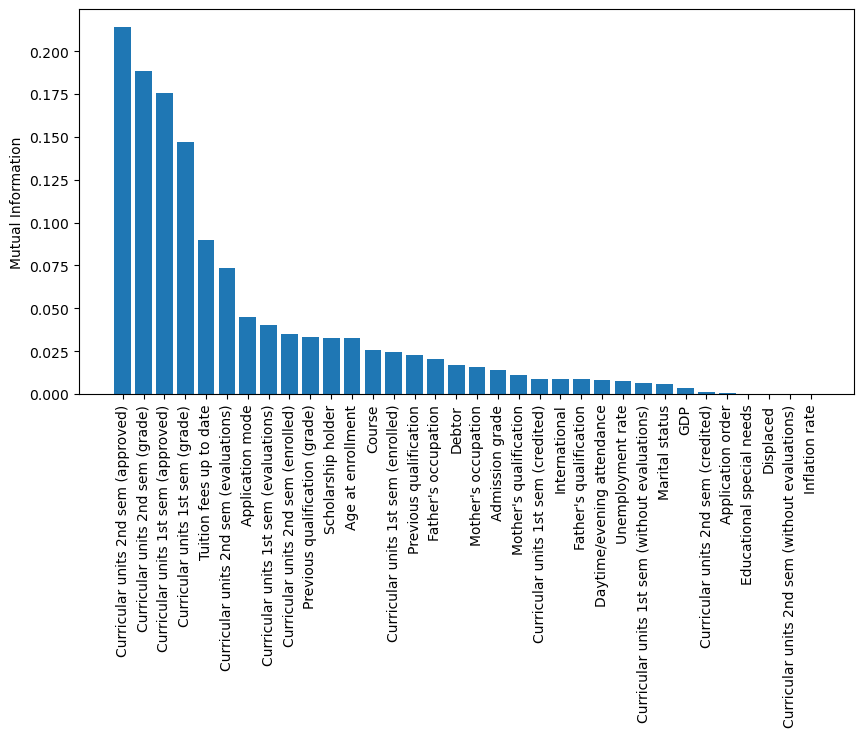

In [5]:
# feature selection using Mutual Information

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)

# sort the mutual information in non-ascending order
mutual_info = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)
# sort the columns in non-ascending order
X_train_sorted = X_train[mutual_info.index]

# plot the mutual information in non-ascending order

plt.figure(figsize=(10, 5))
plt.bar(X_train_sorted.columns, mutual_info)
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()


Num Features: 1, Accuracy: 0.836678
Num Features: 2, Accuracy: 0.815204
Num Features: 3, Accuracy: 0.815768
Num Features: 4, Accuracy: 0.819726
Num Features: 5, Accuracy: 0.846849
Num Features: 6, Accuracy: 0.856741
Num Features: 7, Accuracy: 0.858437
Num Features: 8, Accuracy: 0.860697
Num Features: 9, Accuracy: 0.870021
Num Features: 10, Accuracy: 0.866634
Num Features: 11, Accuracy: 0.865786
Num Features: 12, Accuracy: 0.873694
Num Features: 13, Accuracy: 0.872848
Num Features: 14, Accuracy: 0.875954
Num Features: 15, Accuracy: 0.877087
Num Features: 16, Accuracy: 0.871999
Num Features: 17, Accuracy: 0.874543
Num Features: 18, Accuracy: 0.877652
Num Features: 19, Accuracy: 0.877370
Num Features: 20, Accuracy: 0.876238
Num Features: 21, Accuracy: 0.874544
Num Features: 22, Accuracy: 0.877653
Num Features: 23, Accuracy: 0.878783
Num Features: 24, Accuracy: 0.876804
Num Features: 25, Accuracy: 0.877652
Num Features: 26, Accuracy: 0.878501
Num Features: 27, Accuracy: 0.878499
Num Featur

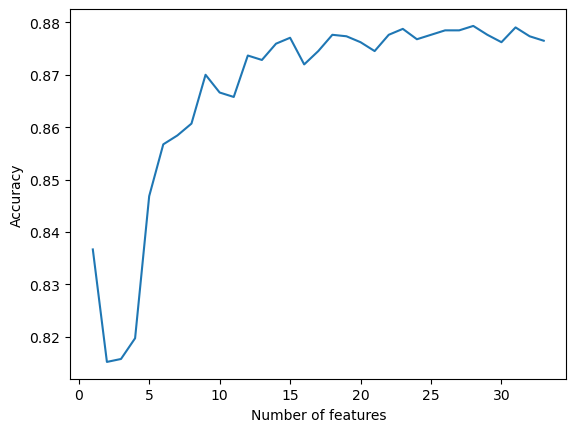

In [6]:
# check the accuracy with the top N features

mi_scores = []
for n in range(1, X.shape[1]):
    X_selected = X_train_sorted[X_train_sorted.columns[:n]]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5)
    mi_scores.append(scores.mean())
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))

plt.plot(range(1, X.shape[1]), mi_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()


In [7]:
# test it on X_test
n_features = 12
X_train_selected = X_train_sorted[X_train_sorted.columns[:n_features]]
X_test_sorted = X_test[mutual_info.index]
X_test_selected = X_test_sorted[X_test_sorted.columns[:n_features]]
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))

0.8553672316384181


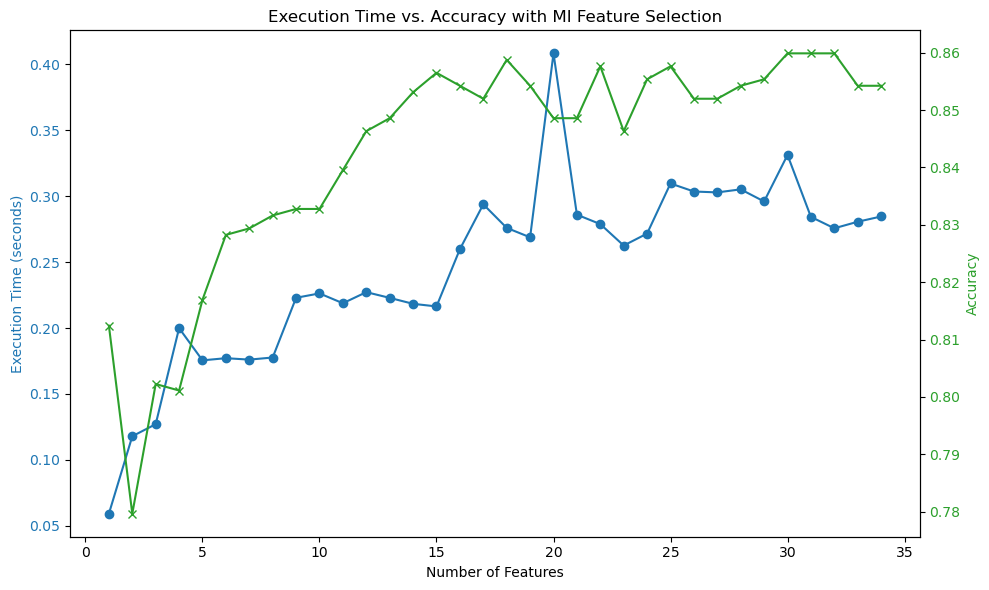

Features: 1, Time: 0.0592 sec, Accuracy: 0.8124
Features: 2, Time: 0.1179 sec, Accuracy: 0.7797
Features: 3, Time: 0.1271 sec, Accuracy: 0.8023
Features: 4, Time: 0.1999 sec, Accuracy: 0.8011
Features: 5, Time: 0.1755 sec, Accuracy: 0.8169
Features: 6, Time: 0.1771 sec, Accuracy: 0.8282
Features: 7, Time: 0.1760 sec, Accuracy: 0.8294
Features: 8, Time: 0.1776 sec, Accuracy: 0.8316
Features: 9, Time: 0.2229 sec, Accuracy: 0.8328
Features: 10, Time: 0.2263 sec, Accuracy: 0.8328
Features: 11, Time: 0.2188 sec, Accuracy: 0.8395
Features: 12, Time: 0.2272 sec, Accuracy: 0.8463
Features: 13, Time: 0.2229 sec, Accuracy: 0.8486
Features: 14, Time: 0.2184 sec, Accuracy: 0.8531
Features: 15, Time: 0.2164 sec, Accuracy: 0.8565
Features: 16, Time: 0.2598 sec, Accuracy: 0.8542
Features: 17, Time: 0.2938 sec, Accuracy: 0.8520
Features: 18, Time: 0.2760 sec, Accuracy: 0.8588
Features: 19, Time: 0.2688 sec, Accuracy: 0.8542
Features: 20, Time: 0.4083 sec, Accuracy: 0.8486
Features: 21, Time: 0.2860 se

In [8]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

# Sort the features based on their MI scores
sorted_indices = np.argsort(mi_scores)[::-1]  # Sorting in descending order

# Lists to store results
num_features_range = range(1, X.shape[1] + 1)  # From 1 to X.shape[1] - 1
execution_times = []
accuracies = []

# Loop through different numbers of features (based on MI scores)
for n_features in num_features_range:
    # Select the top n_features based on MI scores
    selected_features = sorted_indices[:n_features]
    X_train_selected = X_train.iloc[:, selected_features]  
    X_test_selected = X_test.iloc[:, selected_features]  

    
    # Measure the time for training with the selected features
    start_time = time.time()
    model.fit(X_train_selected, y_train)  # Fit on selected features
    end_time = time.time()
    
    # Store the execution time
    execution_times.append(end_time - start_time)
    
    # Optionally, measure accuracy on the test set
    accuracies.append(model.score(X_test_selected, y_test))

# Plotting the results (Execution Time vs. Number of Features)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting execution time on primary y-axis
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Execution Time (seconds)', color='tab:blue')
ax1.plot(num_features_range, execution_times, color='tab:blue', marker='o', label='Execution Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(num_features_range, accuracies, color='tab:green', marker='x', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Execution Time vs. Accuracy with MI Feature Selection')
fig.tight_layout()  
plt.show()

# Print the times and accuracies
for n_features, time_taken, accuracy in zip(num_features_range, execution_times, accuracies):
    print(f"Features: {n_features}, Time: {time_taken:.4f} sec, Accuracy: {accuracy:.4f}")
